# Import Library yang dibutuhkan

In [ ]:
!pip install pydotplus
!pip install graphviz

import numpy as np
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn import tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import dataset

In [ ]:
data = pd.read_csv('stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Cek kualitas dan value yang hilang

In [ ]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data = data.dropna(how='any',axis=0)
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
data.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['gender'] = enc.fit_transform(data['gender'].values)
data['hypertension'] = enc.fit_transform(data['hypertension'].values)
data['heart_disease'] = enc.fit_transform(data['heart_disease'].values)
data['ever_married'] = enc.fit_transform(data['ever_married'].values)
data['work_type'] = enc.fit_transform(data['work_type'].values)
data['Residence_type'] = enc.fit_transform(data['Residence_type'].values)
data['bmi'] = enc.fit_transform(data['bmi'].values)
data['smoking_status'] = enc.fit_transform(data['smoking_status'].values)

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,239,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,198,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,217,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,113,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,163,1,1


# Split train test, test set, dan Menghitung akurasi model



In [ ]:
atr_data = data.drop(columns = 'stroke', axis=1)
atr_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,239,1
2,31112,1,80.0,0,1,1,2,0,105.92,198,2
3,60182,0,49.0,0,0,1,2,1,171.23,217,3
4,1665,0,79.0,1,0,1,3,0,174.12,113,2
5,56669,1,81.0,0,0,1,2,1,186.21,163,1


In [ ]:
cls_data = data['stroke']
cls_data.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split (atr_data, cls_data, test_size = 0.33, random_state = 0)
tree_data = DecisionTreeClassifier(random_state = 0)
tree_data.fit(X_train, y_train)

print('Accuracy : ', tree_data.score(X_test, y_test))

Accuracy :  0.928395061728395


In [ ]:
X_train.shape, X_test.shape

((3289, 11), (1620, 11))

# Memvisualisasikan hasil

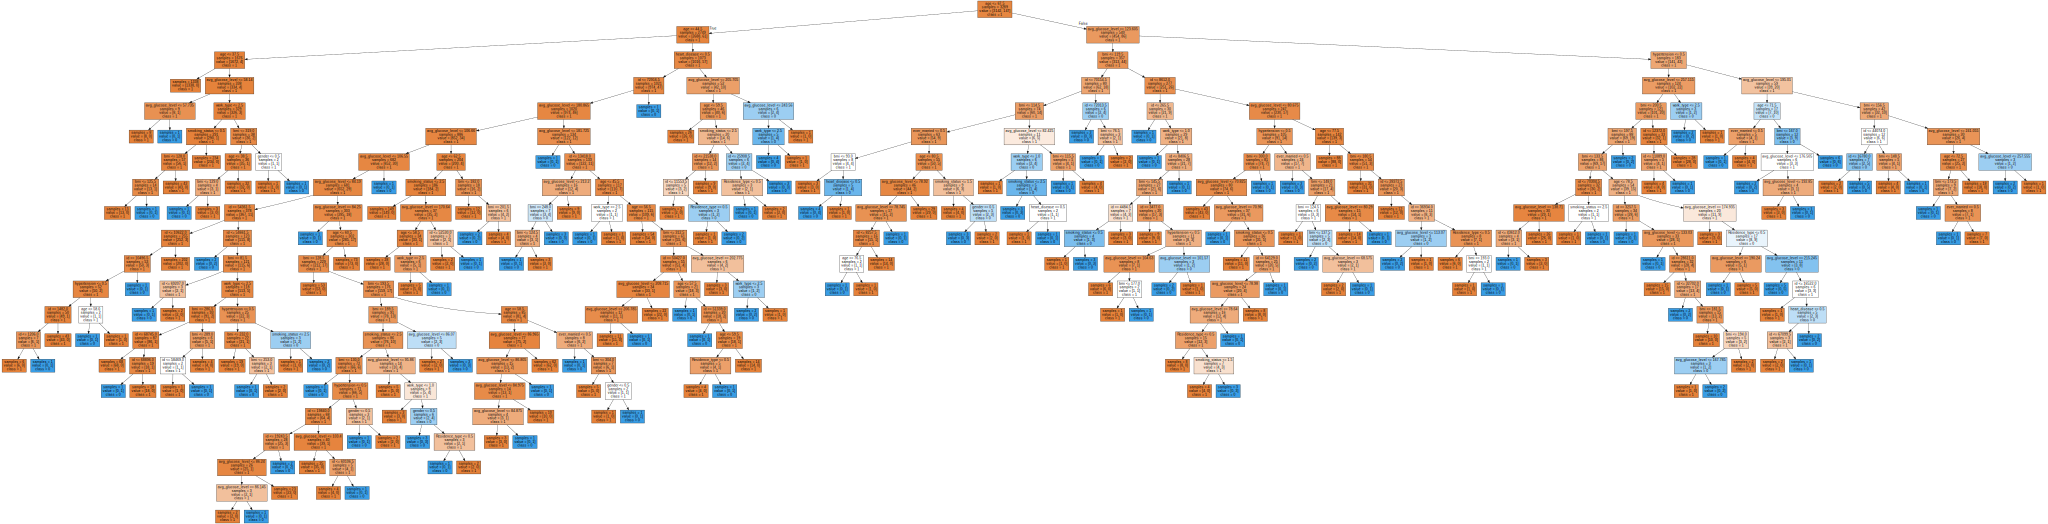

In [ ]:
#Membuat file output
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file='tree_stroke.dot', class_names=["1", "0"],feature_names=atr_data.columns, impurity = False, filled = True)

import graphviz
from sklearn.tree import export_graphviz
with open('tree_stroke.dot') as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)